# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Data imbalance handling with 'SMOTE' method.
- Outlier filteration with 'carling' method and deletion of outliers for 'residual_sugar'.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'k' for 'knn' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [5]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [6]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [7]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [9]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,1
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,1
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,2
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,2
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good,1
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,1
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,2
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,1


In [10]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
wine_df_train.shape

(1279, 12)

In [12]:
# test data shape
wine_df_test.shape

(320, 12)

In [13]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.2,0.34,0.0,1.8,0.05,27.0,63.0,0.9916,3.68,0.79,14.0,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [14]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.2,0.49,0.26,2.3,0.09,23.0,74.0,0.9953,3.71,0.62,12.2,good
5.2,0.32,0.25,1.8,0.103,13.0,50.0,0.9957,3.38,0.55,9.2,bad
5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.9927,3.54,0.62,12.2,good
5.6,0.66,0.0,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,bad
5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.56666667,good
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good


In [15]:
AutoML.generate_custom_config("custom_wine_quality")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2,3,4



Customizing Train Test Split ...



Enter the train size for train test split:  0.7



Customization of train test split has been completed successfully.

Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  3

Enter the feature or list of features for outlier handling:  residual_sugar



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature residual_sugar:  1



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  3



Available hyperparameters for model 'knn' with corresponding indices:
Index 0: k



Enter the list of hyperparameter indices for model 'knn':  0

Enter the index of corresponding update method for hyperparameters 'k' for model 'knn':  1

Enter the list of value for hyperparameter 'k' for model 'knn':  2



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_wine_quality.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoML instance
# Excluding 'svm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoML(task_type="Classification",
             exclude='svm',
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=300,
             verbose=2,
             custom_config_file='custom_wine_quality.json')


 Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.7,
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "carling",
    "OutlierFilterParam": {
        "residual_sugar": {
            "replacement_value": "delete"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "std",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "knn": {
            "k": {
                "Method": "ADD",
                "Value": [
                    2
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
citric_acid,FLOAT,1279,0,None,107,1172,0,0.0,100.0
density,FLOAT,1279,0,None,0,1279,0,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0
quality,VARCHAR(20) CHARACTER SET LATIN,1279,0,0,None,None,None,0.0,100.0
sulphates,FLOAT,1279,0,None,0,1279,0,0.0,100.0
volatile_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
chlorides,FLOAT,1279,0,None,0,1279,0,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0



Statistics of Data:


func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
min,4.6,0.12,0,0.9,0.012,1,6,0.99,2.74,0.33,8.4
std,1.744,0.181,0.195,1.377,0.045,10.503,33.309,0.002,0.152,0.165,1.067
25%,7.1,0.39,0.09,1.9,0.07,7,22,0.996,3.21,0.55,9.5
50%,7.9,0.52,0.26,2.2,0.079,14,38,0.997,3.31,0.62,10.2
75%,9.2,0.635,0.43,2.6,0.09,22,62,0.998,3.4,0.73,11.1
max,15.9,1.58,1,15.4,0.611,72,289,1.004,4.01,2,14.9
mean,8.315,0.528,0.27,2.543,0.087,15.938,46.579,0.997,3.31,0.657,10.429
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


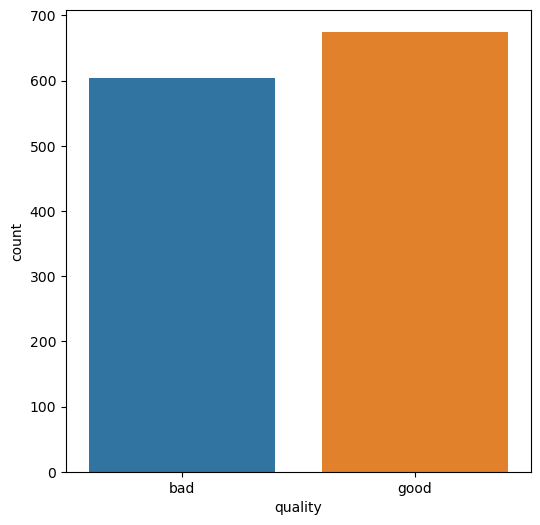

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0   free_sulfur_dioxide           1.563722
1         fixed_acidity           3.049257
2               alcohol           0.781861
3             chlorides           6.567631
4        residual_sugar           9.773260
5             sulphates           3.362002
6  total_sulfur_dioxide           3.674746
7               density           2.658327
8                    pH           2.032838
9           citric_acid           0.078186


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
7.5,0.52,0.42,2.3,0.087,8.0,38.0,0.9972,3.58,0.61,10.5,good
8.6,0.37,0.65,6.4,0.08,3.0,8.0,0.99817,3.27,0.58,11.0,bad
8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.8,11.2,bad
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
8.2,0.885,0.2,1.4,0.086,7.0,31.0,0.9946,3.11,0.46,10.0,bad
8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,good
8.4,0.29,0.4,1.7,0.067,8.0,20.0,0.99603,3.39,0.6,10.5,bad
8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,good
9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.9976,3.29,0.55,10.4,bad
9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,good


Remaining Rows in the data: 1124                                                        
Remaining Columns in the data: 12


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171275546837799"'2


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 22% - 5/22


AutoML will proceed with default encoding technique.                                     


Encoding not required.                                                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.7                                                                       
Testing size  : 0.3                                                                       


chlorides,density,free_sulfur_dioxide,id,fixed_acidity,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,citric_acid,quality
0.111,0.9983,50.0,17,7.5,0.63,110.0,0.77,5.1,9.4,3.26,0.12,0
0.041,0.99386,4.0,20,8.4,0.25,10.0,0.71,2.0,12.5,3.27,0.39,1
0.078,0.99692,10.0,54,9.0,0.785,21.0,0.67,1.7,10.0,3.29,0.24,0
0.095,0.995,25.0,25,7.5,0.6,99.0,0.54,1.8,10.1,3.35,0.03,0
0.08,0.99817,3.0,13,8.6,0.37,8.0,0.58,6.4,11.0,3.27,0.65,0
0.091,1.0004,6.0,24,12.3,0.39,18.0,0.49,2.3,9.5,3.16,0.63,0
0.089,1.0002,5.0,8,12.3,0.5,14.0,0.44,2.2,9.6,3.19,0.49,0
0.089,0.9975,11.0,31,8.2,0.4,43.0,0.61,2.8,10.5,3.53,0.44,1
0.075,0.9933,18.0,19,7.4,0.36,38.0,0.88,1.8,13.6,3.38,0.34,1
0.082,0.9976,10.0,52,8.4,0.56,22.0,0.44,2.0,9.6,3.22,0.04,0


chlorides,density,free_sulfur_dioxide,id,fixed_acidity,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,citric_acid,quality
0.087,0.99645,26.0,11,7.4,0.36,72.0,0.68,2.6,11.0,3.39,0.29,0
0.105,0.9958,16.0,28,8.4,0.56,44.0,0.52,2.1,11.0,3.13,0.08,0
0.092,1.0,15.0,32,12.1,0.4,54.0,0.66,2.0,10.2,3.03,0.52,0
0.403,0.99632,19.0,29,8.6,0.635,56.0,1.15,1.8,9.3,3.02,0.68,0
0.075,0.99598,14.0,34,10.5,0.39,27.0,0.84,2.2,11.4,3.06,0.46,1
0.082,0.99655,15.0,35,7.4,0.55,34.0,0.68,1.8,10.5,3.49,0.19,0
0.067,0.99603,8.0,12,8.4,0.29,20.0,0.6,1.7,10.5,3.39,0.4,0
0.055,0.99516,14.0,21,8.6,0.47,28.0,0.8,2.3,11.2,3.18,0.27,0
0.093,0.99815,19.0,22,9.0,0.46,98.0,0.63,2.8,9.5,3.32,0.31,1
0.107,0.9973,6.0,26,10.5,0.51,15.0,0.66,2.4,11.8,3.09,0.64,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0         fixed_acidity           8.540925
1  total_sulfur_dioxide           8.540925
2                    id           9.964413
3               alcohol           7.829181
4             chlorides           9.964413
5                    pH           9.252669
6           citric_acid           4.982206
7             sulphates           9.163701
8   free_sulfur_dioxide           7.918149
9               density           9.786477
result data stored in tabl

['chlorides', 'citric_acid', 'density', 'free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'alcohol', 'pH', 'fixed_acidity']


['chlorides', 'citric_acid', 'density', 'free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'alcohol', 'pH', 'fixed_acidity']


quality,id,chlorides,citric_acid,density,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,fixed_acidity
1,172,-0.16352771443827324,-1.1955095824012227,0.38932366513371036,0.11931122482298773,0.45833872895930566,1.3236145801247974,-0.4487628853166421,-0.22820973928136914,-0.5682855101272178,1.4719298797220175,-0.6333969718932739
1,780,-0.16352771443827324,-1.2987568115229675,-0.6889513901223733,1.1494618001239054,0.24530487364784176,-0.12129335438980901,-0.4487628853166421,-0.06558015154990159,0.29749219950354655,0.7229824144616643,-0.6922712079573985
0,393,-0.16352771443827324,1.3340475310815283,1.9216092699714022,1.355491915184089,-0.7133474752537449,0.26401542814741935,1.4264532634391032,1.0728269625703757,0.5860847693804692,-0.36639571682612415,1.8981951788640712
1,115,-0.16352771443827324,-0.8341442804751155,0.38932366513371036,0.01629616729289595,0.4849679608732386,-0.442384006504166,0.238816369227131,0.09704943618156668,0.39368972279585523,1.812360545749453,-0.5156484997650251
1,143,-0.16352771443827324,0.3015752398640789,-0.2916921592385762,0.8404166275336301,-0.8731228667373425,0.7777604715303905,1.2389316485635287,0.25967902391303493,0.5860847693804692,-0.29830958362063587,-0.04465461125203132
0,493,-0.16352771443827324,-1.2987568115229675,0.04881575294759858,2.4886575480150985,0.19204640981997578,0.23190636293598366,0.4888451890612306,-0.716098502475774,-0.6644830334195265,0.5868101480506908,-0.8100196800856467
0,383,-0.16352771443827324,-1.3503804260838401,0.5595776212268292,0.2223262823530795,1.0175525991518977,-0.6029293325613444,-0.32374847539959234,-0.22820973928136914,-0.9530756032964474,0.654896281256179,-0.5745227358291498
0,682,-0.16352771443827324,-1.3503804260838401,0.502826302529144,-0.4987791203575629,0.8844064395822329,-0.4102749412927303,-0.7612989101092659,0.42230861164450323,-0.8568780800041405,0.8591546808726379,-0.16240308338027953
0,747,0.5360349551828429,0.869435000033676,0.16231839034296916,0.6343865124734466,2.0827218757092165,2.1584502756221253,0.4888451890612306,-0.22820973928136914,-1.145470649881063,-0.43448185003160944,-0.33902579157265234
1,855,0.5360349551828429,-1.3503804260838401,-0.1781895218432056,-1.322899580598297,0.7778895119265009,-1.180892506367187,-0.32374847539959234,-0.716098502475774,-0.6644830334195265,0.2463794820232584,-0.7511454440215226


quality,id,chlorides,citric_acid,density,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,fixed_acidity
1,153,-0.22525383234601884,-1.2471331969620953,-0.6322000714246879,-0.4987791203575629,0.1387879459921098,-0.3781658760812946,-0.19873406548254255,0.42230861164450323,0.39368972279585523,0.31446561522874367,-0.4567742637009011
1,269,-0.22525383234601884,-0.9373915095968602,-0.8024540275178068,0.8404166275336301,-0.07424590931935347,-0.05707522396693762,0.17630916426860682,-0.716098502475774,-0.08729789366568129,1.9485328121604264,-1.2810135685986417
0,132,-0.3075553228896796,-0.5760262076707531,1.297344764296801,-0.4987791203575629,2.6153065139878753,0.23190636293598366,-1.0113277299433654,5.95171459451442,-0.4720879868349109,0.38255174843423195,0.07309386087621791
1,292,0.18625362037228482,-1.3503804260838401,0.04881575294759858,-0.18973394776728758,0.45833872895930566,-0.2818386804469875,-0.4487628853166421,-0.716098502475774,-1.337865696465677,0.38255174843423195,-0.6333969718932739
1,316,-0.6573366577002375,0.2499516253032064,-1.1429619397039186,-0.08671889023719583,-0.8731228667373425,-0.5708202673499088,0.6763668039368053,-0.5534689147443057,0.8746773392573918,-0.570654116442583,-0.6333969718932739
0,435,0.04222601192087844,-0.9373915095968602,-1.029459302308548,1.6645370877743644,0.29856333747570774,-0.08918428917837332,-0.4487628853166421,-0.5534689147443057,0.10509715291893264,0.9272408140781262,-1.222139332534517
0,228,-0.22525383234601884,-0.9890151241577329,0.44607498383145866,0.01629616729289595,0.4849679608732386,1.2593964497019259,-0.698791705150741,0.42230861164450323,-0.6644830334195265,1.3357576133110438,-0.6333969718932739
0,131,-0.3692814407974249,-0.00816644750115589,0.8433342147152557,2.0765973178947315,0.29856333747570774,2.3832137321021754,-1.0113277299433654,8.065899235023506,-0.9530756032964474,0.38255174843423195,-0.5156484997650251
0,60,0.04222601192087844,-0.7825206659142431,-0.12143820314545731,0.01629616729289595,1.0708110629797638,0.520887949838905,1.051410033687954,-0.716098502475774,-0.7606805567118334,-0.8429986492645302,0.07309386087621791
1,111,-0.5133090492488314,-0.11141367662290091,-0.3484434779362615,-0.6017941778876547,-0.5535720837701469,-0.6029293325613444,-0.7612989101092659,-0.06558015154990159,-0.18349541695798996,-0.43448185003160944,-0.04465461125203132


['chlorides', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'pH']


['r_chlorides', 'r_density', 'r_volatile_acidity', 'r_total_sulfur_dioxide', 'r_sulphates', 'r_alcohol', 'r_pH']


quality,id,r_chlorides,r_density,r_volatile_acidity,r_total_sulfur_dioxide,r_sulphates,r_alcohol,r_pH
1,172,-0.16352771443827324,0.38932366513371036,0.45833872895930566,1.3236145801247974,-0.4487628853166421,-0.5682855101272178,1.4719298797220175
1,780,-0.16352771443827324,-0.6889513901223733,0.24530487364784176,-0.12129335438980901,-0.4487628853166421,0.29749219950354655,0.7229824144616643
0,393,-0.16352771443827324,1.9216092699714022,-0.7133474752537449,0.26401542814741935,1.4264532634391032,0.5860847693804692,-0.36639571682612415
1,115,-0.16352771443827324,0.38932366513371036,0.4849679608732386,-0.442384006504166,0.238816369227131,0.39368972279585523,1.812360545749453
1,143,-0.16352771443827324,-0.2916921592385762,-0.8731228667373425,0.7777604715303905,1.2389316485635287,0.5860847693804692,-0.29830958362063587
0,493,-0.16352771443827324,0.04881575294759858,0.19204640981997578,0.23190636293598366,0.4888451890612306,-0.6644830334195265,0.5868101480506908
0,383,-0.16352771443827324,0.5595776212268292,1.0175525991518977,-0.6029293325613444,-0.32374847539959234,-0.9530756032964474,0.654896281256179
0,682,-0.16352771443827324,0.502826302529144,0.8844064395822329,-0.4102749412927303,-0.7612989101092659,-0.8568780800041405,0.8591546808726379
0,747,0.5360349551828429,0.16231839034296916,2.0827218757092165,2.1584502756221253,0.4888451890612306,-1.145470649881063,-0.43448185003160944
1,855,0.5360349551828429,-0.1781895218432056,0.7778895119265009,-1.180892506367187,-0.32374847539959234,-0.6644830334195265,0.2463794820232584


quality,id,r_chlorides,r_density,r_volatile_acidity,r_total_sulfur_dioxide,r_sulphates,r_alcohol,r_pH
1,153,-0.22525383234601884,-0.6322000714246879,0.1387879459921098,-0.3781658760812946,-0.19873406548254255,0.39368972279585523,0.31446561522874367
1,269,-0.22525383234601884,-0.8024540275178068,-0.07424590931935347,-0.05707522396693762,0.17630916426860682,-0.08729789366568129,1.9485328121604264
0,132,-0.3075553228896796,1.297344764296801,2.6153065139878753,0.23190636293598366,-1.0113277299433654,-0.4720879868349109,0.38255174843423195
1,292,0.18625362037228482,0.04881575294759858,0.45833872895930566,-0.2818386804469875,-0.4487628853166421,-1.337865696465677,0.38255174843423195
1,316,-0.6573366577002375,-1.1429619397039186,-0.8731228667373425,-0.5708202673499088,0.6763668039368053,0.8746773392573918,-0.570654116442583
0,435,0.04222601192087844,-1.029459302308548,0.29856333747570774,-0.08918428917837332,-0.4487628853166421,0.10509715291893264,0.9272408140781262
0,228,-0.22525383234601884,0.44607498383145866,0.4849679608732386,1.2593964497019259,-0.698791705150741,-0.6644830334195265,1.3357576133110438
0,131,-0.3692814407974249,0.8433342147152557,0.29856333747570774,2.3832137321021754,-1.0113277299433654,-0.9530756032964474,0.38255174843423195
0,60,0.04222601192087844,-0.12143820314545731,1.0708110629797638,0.520887949838905,1.051410033687954,-0.7606805567118334,-0.8429986492645302
1,111,-0.5133090492488314,-0.3484434779362615,-0.5535720837701469,-0.6029293325613444,-0.7612989101092659,-0.18349541695798996,-0.43448185003160944


['chlorides', 'density', 'free_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'alcohol', 'pH', 'citric_acid']


quality,id,chlorides,density,free_sulfur_dioxide,fixed_acidity,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,citric_acid
0,691,0.0010752666490523235,-0.2917435688566671,0.11931122482298766,-0.339025791572647,0.6713725842707667,1.580487101816282,-1.0738349349018899,-0.3908393270128422,-0.8568781484502609,0.04212108240678443,-0.16303729118377228
0,756,0.3920073467314408,-0.4449065388188999,0.4283563974132628,-0.692271207957393,1.1240695268076266,1.195178319279054,-0.94882052498484,-0.8787280902072463,-0.8568781484502609,-0.842998649264542,-0.5760262076707525
0,283,0.3920073467314408,0.7293428975582603,-1.1168694655381128,1.1917043460945849,-0.5535720837701489,-1.0845653107328792,1.1139172386464797,3.51227077854239,1.067072471068962,-0.23022345041516265,1.2308003019597855
0,1202,-0.019500105986862873,0.8427969493821271,0.8404166275336297,0.3085908051327205,-0.1275043731472217,2.4153227973136095,-0.26124127044106676,0.584938199375966,-0.8568781484502609,-0.3663957168261362,0.4048224689858254
1,299,2.57299684613845,1.523521260325391,-1.0138544080080212,1.1917043460945849,-0.7133474752537466,-1.0524562455214437,-0.19873406548254188,0.09704943618156156,-0.8568781484502609,-0.842998649264542,0.8178113854728053
0,859,-0.6779120303361484,-0.18396221962396841,-0.9108393504779295,-0.339025791572647,0.2985633374757051,-1.0845653107328792,-0.5737772952336906,0.42230861164449784,0.3936897542372348,0.45063788163970503,-1.3503804260838401
0,261,-0.7190627756079789,-1.7553008373847254,-0.2927490052973792,-1.281013568598636,0.9110356714961628,-0.6350383977727798,-0.94882052498484,0.42230861164449784,1.451862594972807,1.7442744125439522,-0.834144280475115
0,884,-0.7190627756079789,-0.12156249112080388,2.07659731789473,-0.692271207957393,-1.2459321135324055,2.575868123370788,6.0519864303699435,-0.22820973928137403,-0.8568781484502609,-2.5451519794017097,0.1983280107423352
1,661,-0.28697995025376016,-0.4619246465924673,-0.3957640628274709,-0.8100196800856413,-0.2872797646308195,-0.5387112021384728,-0.4487628853166415,-0.0655801515499066,-0.1834954316185335,0.7229824144616521,-0.834144280475115
0,351,-0.28697995025376016,0.04861858661499636,-0.08671889023719577,-0.5745227358291444,0.19204640981997328,0.2640154281474192,-0.3862556803581166,0.09704943618156156,-0.1834954316185335,0.9953269472835993,0.1983280107423352


quality,id,chlorides,density,free_sulfur_dioxide,fixed_acidity,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,citric_acid
1,23,-0.24582920498192976,-0.41087032327170203,-0.4987791203575626,-0.044654611252026084,-1.032898258220942,0.007142906455933769,0.9889028287294306,0.09704943618156156,0.5860848161891564,-0.2983095836206479,0.35319885442495286
1,22,0.10395212982862831,0.8144334364261604,0.3253413398831711,0.42633927726096865,-0.44705515611441704,1.6447052322391533,-0.13622686052401697,0.7475677871074334,-0.8568781484502609,0.04212108240678443,0.24995162530320775
1,26,0.3920073467314408,0.3322537161746634,-1.0138544080080212,1.309452818222833,-0.18076283697508766,-1.020347180310008,0.05129475435155773,0.09704943618156156,1.3556650639968464,-1.5238599813194098,1.9535309058120007
0,12,-0.43100755870516627,-0.3881795129069665,-0.8078242929478378,0.07309386087622313,-1.3524490411881374,-0.8598018542528295,-0.3237484753995917,-1.0413576779387144,0.10509716130935064,0.5187240148451934,0.7145641563510605
1,16,-0.18410308707418416,1.4667942344134577,1.2524768576539966,2.3691890673770706,-1.458965968843869,-0.02496615875550191,0.9263956237709057,1.235456550301838,-0.1834954316185335,-0.7749125160590538,1.179176687398913
1,18,-0.16352771443826897,0.8427969493821271,-0.6017941778876543,1.309452818222833,-1.4057075050160028,-0.7313655934070868,1.4889604683976292,-1.0413576779387144,-0.9530756794262217,-0.7749125160590538,1.2824239165206581
0,28,0.3508566014596104,-0.5186516725044007,0.016296167292895944,0.07309386087622313,0.08552948216424201,-0.08918428917837326,-0.8238061150677902,-0.3908393270128422,0.5860848161891564,-1.2515154484974627,-0.9373915095968599
0,32,0.08337675719271312,1.8638834157970545,-0.08671889023719577,2.2514405952488215,-0.7666059390816123,0.23190636293598352,0.05129475435155773,-0.5534689147443104,-0.1834954316185335,-1.9323767805523304,1.3340475310815307
0,29,6.4823176469623345,-0.2236711377623344,0.3253413398831711,0.1908423330044713,0.4849679608732359,0.2961244933588549,3.1141477973192746,-0.8787280902072463,-1.0492732104021825,-2.000462913757816,2.160025364055491
1,51,-0.20467845971009938,-0.813632207246467,1.8705672028345468,-0.5156484997650198,-0.1275043731472217,0.45666981941603324,-0.3862556803581166,0.09704943618156156,0.3936897542372348,0.7910685476671404,-0.6792734367924974


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


                                                                                          
Completed customized hyperparameter update.


response_column : quality                                                                                                                             
name : glm
family : BINOMIAL
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for glm : 1296
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : quality
name : knn
model_type : Classification
k : (2, 3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 7
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GLM_534                                                                                                                                                                                                 
GLM_535                                                                                   
GLM_536                                                                                   


KNN_0                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


DECISIONFOREST_2                                                                                                                                                                                        


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,rfe,0.707101,0.707101,0.707101,0.707101,0.706995,0.705492,0.705738,0.707041,0.707101,0.706567
1,2,xgboost,pca,0.704142,0.704142,0.704142,0.704142,0.703910,0.702652,0.702883,0.704018,0.704142,0.703684
2,3,knn,rfe,0.683432,0.683432,0.683432,0.683432,0.688295,0.679082,0.677719,0.687399,0.683432,0.679497
3,4,decision_forest,pca,0.680473,0.680473,0.680473,0.680473,0.680602,0.680906,0.680373,0.681504,0.680473,0.680608
4,5,knn,lasso,0.680473,0.680473,0.680473,0.680473,0.681007,0.677960,0.677936,0.680845,0.680473,0.679120
5,6,knn,pca,0.665680,0.665680,0.665680,0.665680,0.666089,0.663019,0.662844,0.665970,0.665680,0.664125
6,7,glm,lasso,0.656805,0.656805,0.656805,0.656805,0.656197,0.655233,0.655345,0.656481,0.656805,0.656274
7,8,glm,pca,0.606509,0.606509,0.606509,0.606509,0.606659,0.602518,0.600633,0.606628,0.606509,0.602639
8,9,xgboost,lasso,0.479290,0.479290,0.479290,0.479290,0.239645,0.500000,0.324000,0.229719,0.479290,0.310580
9,10,xgboost,rfe,0.479290,0.479290,0.479290,0.479290,0.239645,0.500000,0.324000,0.229719,0.479290,0.310580


In [18]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,rfe,0.707101,0.707101,0.707101,0.707101,0.706995,0.705492,0.705738,0.707041,0.707101,0.706567
1,2,xgboost,pca,0.704142,0.704142,0.704142,0.704142,0.703910,0.702652,0.702883,0.704018,0.704142,0.703684
2,3,knn,rfe,0.683432,0.683432,0.683432,0.683432,0.688295,0.679082,0.677719,0.687399,0.683432,0.679497
3,4,decision_forest,pca,0.680473,0.680473,0.680473,0.680473,0.680602,0.680906,0.680373,0.681504,0.680473,0.680608
4,5,knn,lasso,0.680473,0.680473,0.680473,0.680473,0.681007,0.677960,0.677936,0.680845,0.680473,0.679120
5,6,knn,pca,0.665680,0.665680,0.665680,0.665680,0.666089,0.663019,0.662844,0.665970,0.665680,0.664125
6,7,glm,lasso,0.656805,0.656805,0.656805,0.656805,0.656197,0.655233,0.655345,0.656481,0.656805,0.656274
7,8,glm,pca,0.606509,0.606509,0.606509,0.606509,0.606659,0.602518,0.600633,0.606628,0.606509,0.602639
8,9,xgboost,lasso,0.479290,0.479290,0.479290,0.479290,0.239645,0.500000,0.324000,0.229719,0.479290,0.310580
9,10,xgboost,rfe,0.479290,0.479290,0.479290,0.479290,0.239645,0.500000,0.324000,0.229719,0.479290,0.310580


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,glm,rfe,0.707101,0.707101,0.707101,0.707101,0.706995,0.705492,0.705738,0.707041,0.707101,0.706567


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [21]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

glm rfe
Target Column Mapping:
good: 1
bad: 0

 Prediction : 
    id  prediction      prob  quality
0  153         1.0  0.709635        1
1  269         1.0  0.797301        1
2  132         0.0  0.878860        0
3  292         0.0  0.829714        1
4  316         1.0  0.899332        1
5  435         1.0  0.636830        0
6  228         0.0  0.713106        0
7  131         0.0  0.897095        0
8   60         0.0  0.689353        0
9  111         0.0  0.561428        1

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2       54      131   0.708108  0.744318  0.725762      176
0               0  CLASS_1      108       45   0.705882  0.666667  0.685714      162

 ROC-AUC : 


AUC,GINI
0.5814393939393939,0.16287878787878785


threshold_value,tpr,fpr
0.04081632653061224,0.7443181818181818,0.3333333333333333
0.08163265306122448,0.7443181818181818,0.3333333333333333
0.1020408163265306,0.7443181818181818,0.3333333333333333
0.12244897959183673,0.7443181818181818,0.3333333333333333
0.16326530612244897,0.7443181818181818,0.3333333333333333
0.18367346938775508,0.7443181818181818,0.3333333333333333
0.14285714285714285,0.7443181818181818,0.3333333333333333
0.061224489795918366,0.7443181818181818,0.3333333333333333
0.02040816326530612,0.7443181818181818,0.3333333333333333
0.0,1.0,1.0



 Confusion Matrix : 


array([[108,  54],
       [ 45, 131]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,quality
14,0.0,0.5624350826796123,0
18,1.0,0.6010561955015115,1
21,1.0,0.8685309065863012,0
22,0.0,0.7642463532987435,1
26,1.0,0.8100130902883447,1
28,0.0,0.5405578660792303,0
23,1.0,0.8784015803719886,1
16,1.0,0.6683413122304052,1
12,1.0,0.7695086748486205,0
11,1.0,0.8213092886710963,0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(wine_df_test,3)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171278654703831"'

Updated dataset after performing target column transformation :


chlorides,id,density,free_sulfur_dioxide,citric_acid,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,fixed_acidity,quality
0.074,102,1.0008,10.0,0.66,0.58,47.0,0.57,2.2,9.0,3.25,11.6,0
0.17,363,0.9986,51.0,0.19,0.62,148.0,0.93,3.9,9.2,3.17,8.9,0
0.08,106,0.9962,33.0,0.21,0.69,141.0,0.51,2.1,9.9,3.25,7.9,0
0.267,532,0.99471,16.0,0.0,0.815,29.0,0.51,1.2,9.8,3.32,6.8,0
0.088,330,0.99694,16.0,0.26,0.685,23.0,0.47,1.6,9.4,3.32,8.8,0
0.088,30,0.999,19.0,0.0,0.69,38.0,0.6,2.4,9.3,3.35,9.0,0
0.062,153,0.99352,21.0,0.0,0.5,28.0,0.55,1.8,12.3,3.44,6.6,1
0.062,31,0.9974,8.0,0.34,0.24,22.0,0.94,5.1,10.9,3.22,8.2,1
0.053,375,0.9982,5.0,0.36,0.645,14.0,0.42,1.8,10.0,3.17,10.2,1
0.046,213,0.9902,29.0,0.5,0.4,80.0,0.66,4.3,13.6,3.49,5.0,1


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171278187418074"'

Updated dataset after performing Lasso feature selection:


id,chlorides,citric_acid,density,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,fixed_acidity,quality
339,0.095,0.39,0.9986,5.0,0.59,22.0,0.58,2.3,10.3,3.37,8.9,0
203,0.087,0.28,0.998,23.0,0.51,54.0,0.74,2.1,9.2,3.42,7.7,0
476,0.087,0.28,1.0001,18.0,0.615,72.0,0.53,3.2,9.7,3.31,9.4,0
61,0.083,0.4,0.9978,16.0,0.33,68.0,0.48,2.6,9.4,3.3,8.6,0
308,0.083,0.06,0.9986,8.0,0.63,29.0,0.73,2.0,9.6,3.67,7.1,0
196,0.083,0.41,0.9982,11.0,0.35,61.0,0.5,2.3,9.5,3.21,9.9,0
134,0.083,0.52,0.9976,14.0,0.43,23.0,0.61,2.3,11.3,3.35,9.2,1
75,0.083,0.26,0.9962,17.0,0.6,91.0,0.56,2.1,9.8,3.29,7.4,1
73,0.083,0.27,0.9962,17.0,0.63,91.0,0.58,2.0,9.8,3.26,7.5,1
189,0.083,0.66,1.0022,7.0,0.615,42.0,0.73,5.8,10.0,3.07,12.8,1



Updated dataset after performing scaling on Lasso selected features :


quality,id,chlorides,citric_acid,density,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,fixed_acidity
1,73,-0.10180159653052766,0.043457167059716625,-0.2916921592385762,0.11931122482298773,0.45833872895930566,1.4199417757591044,-0.4487628853166421,-0.5534689147443057,-0.5682855101272178,-0.36639571682612415,-0.4567742637009011
1,163,-0.10180159653052766,0.6629405417901862,1.2405934455991159,0.5313714549433548,0.6181141204429036,0.39245168899316213,0.36383077914418077,1.398086138033312,1.0670723858420057,0.38255174843423195,0.8973331657739585
1,9,-0.060650851258697264,2.160025364055488,2.659376413041437,0.11931122482298773,-0.6867182433398119,-0.12129335438980901,0.9263956237709048,0.9101973748389073,-0.3758904635426039,-1.728118380935857,3.1934283722748056
1,17,-0.060650851258697264,2.160025364055488,2.659376413041437,0.11931122482298773,-0.6867182433398119,-0.12129335438980901,0.9263956237709048,0.9101973748389073,-0.3758904635426039,-1.728118380935857,3.1934283722748056
1,89,0.3714319740955213,1.5921656038858905,-0.4051947966339468,-1.1168694655381135,-0.8731228667373425,-1.1166743759443156,-0.636284500192216,-0.06558015154990159,0.9708748625496988,0.31446561522874367,-0.4567742637009011
1,298,0.18625362037228482,-0.00816644750115589,0.502826302529144,-0.91083935047793,-0.020987445491487507,-0.5066021369270374,-0.32374847539959234,0.25967902391303493,-1.0492731265887543,-0.29830958362063587,0.24971656906859022
0,540,0.7417886815419946,-1.3503804260838401,1.694603995180661,0.5313714549433548,0.7778895119265009,0.36034262378172643,0.4263379841027057,5.301196243588547,-0.18349541695798996,0.9953269472836115,-0.8688939161497713
0,173,0.14510287510045441,1.4372947602032733,1.9216092699714022,0.5313714549433548,-0.8198644029094765,1.7410324278734615,-0.8863133200263157,0.5849381993759715,-0.8568780800041405,-1.2515154484974509,1.6626982346075738
0,339,0.14510287510045441,0.6629405417901862,1.0703394895060598,-1.1168694655381135,0.24530487364784176,-0.7955837238299587,-0.4487628853166421,-0.06558015154990159,-0.08729789366568129,0.38255174843423195,0.3674650411968395
0,460,-0.019500105986867158,1.0759294582771657,0.5595776212268292,-1.0138544080080218,-0.7666059390816106,-0.8598018542528301,-0.9488205249848406,0.25967902391303493,0.10509715291893264,-1.1153431820864772,0.661836221517461



Updated dataset after performing RFE feature selection:


id,chlorides,density,volatile_acidity,total_sulfur_dioxide,sulphates,alcohol,pH,quality
73,0.083,0.9962,0.63,91.0,0.58,9.8,3.26,1
163,0.083,0.9989,0.66,59.0,0.71,11.5,3.37,1
9,0.085,1.0014,0.415,43.0,0.8,10.0,3.06,1
17,0.085,1.0014,0.415,43.0,0.8,10.0,3.06,1
89,0.106,0.996,0.38,12.0,0.55,11.4,3.36,1
298,0.097,0.9976,0.54,31.0,0.6,9.3,3.27,1
540,0.124,0.9997,0.69,58.0,0.72,10.2,3.46,0
173,0.095,1.0001,0.39,101.0,0.51,9.5,3.13,0
339,0.095,0.9986,0.59,22.0,0.58,10.3,3.37,0
460,0.087,0.9977,0.4,20.0,0.5,10.5,3.15,0



Updated dataset after performing scaling on RFE selected features :


id,quality,r_chlorides,r_density,r_volatile_acidity,r_total_sulfur_dioxide,r_sulphates,r_alcohol,r_pH
73,1,-0.10180159653052766,-0.2916921592385762,0.45833872895930566,1.4199417757591044,-0.4487628853166421,-0.5682855101272178,-0.36639571682612415
163,1,-0.10180159653052766,1.2405934455991159,0.6181141204429036,0.39245168899316213,0.36383077914418077,1.0670723858420057,0.38255174843423195
9,1,-0.060650851258697264,2.659376413041437,-0.6867182433398119,-0.12129335438980901,0.9263956237709048,-0.3758904635426039,-1.728118380935857
17,1,-0.060650851258697264,2.659376413041437,-0.6867182433398119,-0.12129335438980901,0.9263956237709048,-0.3758904635426039,-1.728118380935857
89,1,0.3714319740955213,-0.4051947966339468,-0.8731228667373425,-1.1166743759443156,-0.636284500192216,0.9708748625496988,0.31446561522874367
298,1,0.18625362037228482,0.502826302529144,-0.020987445491487507,-0.5066021369270374,-0.32374847539959234,-1.0492731265887543,-0.29830958362063587
540,0,0.7417886815419946,1.694603995180661,0.7778895119265009,0.36034262378172643,0.4263379841027057,-0.18349541695798996,0.9953269472836115
173,0,0.14510287510045441,1.9216092699714022,-0.8198644029094765,1.7410324278734615,-0.8863133200263157,-0.8568780800041405,-1.2515154484974509
339,0,0.14510287510045441,1.0703394895060598,0.24530487364784176,-0.7955837238299587,-0.4487628853166421,-0.08729789366568129,0.38255174843423195
460,0,-0.019500105986867158,0.5595776212268292,-0.7666059390816106,-0.8598018542528301,-0.9488205249848406,0.10509715291893264,-1.1153431820864772



Updated dataset after performing scaling for PCA feature selection :


quality,id,chlorides,density,free_sulfur_dioxide,fixed_acidity,volatile_acidity,total_sulfur_dioxide,sulphates,residual_sugar,alcohol,pH,citric_acid
1,73,-0.10180159653052338,-0.2917435688566671,0.11931122482298766,-0.4567742637008957,0.45833872895930294,1.4199417757591035,-0.4487628853166415,-0.5534689147443104,-0.5682855555223767,-0.3663957168261362,0.04345716705971781
1,163,-0.10180159653052338,1.2398861307657238,0.5313714549433545,0.8973331657739635,0.6181141204429007,0.3924516889931619,0.36383077914418155,1.398086138033306,1.067072471068962,0.3825517484342198,0.6629405417901879
1,9,-0.06065085125869298,2.658061778564248,0.11931122482298766,3.19342837227481,-0.6867182433398137,-0.12129335438980894,0.9263956237709057,0.9101973748389016,-0.3758904935704551,-1.7281183809358687,2.160025364055491
1,17,-0.06065085125869298,2.658061778564248,0.11931122482298766,3.19342837227481,-0.6867182433398137,-0.12129335438980894,0.9263956237709057,0.9101973748389016,-0.3758904935704551,-1.7281183809358687,2.160025364055491
1,89,0.3714319740955256,-0.4051976206805339,-1.1168694655381128,-0.4567742637008957,-0.8731228667373442,-1.116674375944315,-0.6362845001922155,-0.0655801515499066,0.9708749400930013,0.3144656152287315,1.592165603885893
1,298,0.1862536203722891,0.5024347939105266,-0.9108393504779295,0.24971656906859538,-0.020987445491489856,-0.506602136927037,-0.3237484753995917,0.2596790239130297,-1.0492732104021825,-0.2983095836206479,-0.00816644750115475
0,540,0.7417886815419988,1.6937023380612541,0.5313714549433545,-0.8688939161497659,0.7778895119264979,0.3603426237817262,0.42633798410270646,5.301196243588538,-0.1834954316185335,0.9953269472835993,-1.3503804260838401
0,173,0.14510287510045872,1.9206104417089878,0.5313714549433545,1.6626982346075787,-0.8198644029094783,1.7410324278734604,-0.8863133200263151,0.584938199375966,-0.8568781484502609,-1.2515154484974627,1.4372947602032757
0,339,0.14510287510045872,1.0697050530299237,-1.1168694655381128,0.3674650411968446,0.2453048736478392,-0.7955837238299581,-0.4487628853166415,-0.0655801515499066,-0.08729790064257098,0.3825517484342198,0.6629405417901879
0,460,-0.019500105986862873,0.55916181982246,-1.0138544080080212,0.661836221517466,-0.7666059390816123,-0.8598018542528295,-0.94882052498484,0.2596790239130297,0.10509716130935064,-1.1153431820864892,1.075929458277168



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,134,0.943475,-1.187782,0.108464,-0.619012,-0.208134,0.135340,-0.275565,-1.098738,-0.134348,1
1,540,0.089294,1.948616,-0.975540,-2.244083,4.580170,1.122813,-1.552514,1.315246,-0.062589,0
2,75,-0.539037,1.206630,0.305220,0.179104,-0.652198,-0.528362,-0.164501,0.042616,0.832903,1
3,173,2.956812,1.943302,0.140798,-1.124252,-0.993683,-0.257049,-0.540921,-0.549165,0.366807,0
4,73,-0.433481,1.220324,0.300789,0.317729,-0.706810,-0.653613,0.076971,0.066310,0.833634,1
...,...,...,...,...,...,...,...,...,...,...,...
315,219,-0.566076,0.647555,1.142357,-0.806932,-0.128768,0.124165,-0.614114,0.007013,-0.477321,1
316,135,1.500231,0.010773,3.382115,-0.738791,-1.524419,-1.962007,0.260913,0.160823,-1.402149,1
317,85,3.458731,0.610991,0.967761,-0.916946,-0.233453,0.400433,0.866199,-0.453455,-0.390362,1
318,209,-3.608479,-2.561497,-0.239385,0.144697,1.489044,0.146052,-0.133260,-0.878244,0.376858,1


Data Transformation completed.
knn rfe
Target Column Mapping:
good: 1
bad: 0

 Prediction : 
   id  prediction  quality
0  14           0        1
1  22           1        1
2  27           1        1
3  41           1        0
4  10           1        1
5  15           1        0
6  12           1        0
7  29           1        1
8   9           1        1
9  11           1        0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2       55      134   0.708995  0.744444  0.726287      180
0               0  CLASS_1       85       46   0.648855  0.607143  0.627306      140

 ROC-AUC : 


AUC,GINI
0.5295634920634921,0.05912698412698414


threshold_value,tpr,fpr
0.04081632653061224,0.7444444444444445,0.39285714285714285
0.08163265306122448,0.7444444444444445,0.39285714285714285
0.1020408163265306,0.7444444444444445,0.39285714285714285
0.12244897959183673,0.7444444444444445,0.39285714285714285
0.16326530612244897,0.7444444444444445,0.39285714285714285
0.18367346938775508,0.7444444444444445,0.39285714285714285
0.14285714285714285,0.7444444444444445,0.39285714285714285
0.061224489795918366,0.7444444444444445,0.39285714285714285
0.02040816326530612,0.7444444444444445,0.39285714285714285
0.0,1.0,1.0



 Confusion Matrix : 


array([[ 85,  55],
       [ 46, 134]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

id,prediction,quality
10,1,1
12,1,0
13,1,0
14,0,1
16,0,0
17,1,1
15,1,0
11,1,0
9,1,1
8,0,0


In [ ]:
remove_context()